# GRIP_TASK_1 : PREDICTION USING SUPERVISED ML

@AJAY_KASHYAP

***TASK_GUIDELINES*** \
Predict the percentage of an student based on the no. of study hours. \
● This is a simple linear regression task as it involves just 2 variables. \
● You can use R, Python, SAS Enterprise Miner or any other tool \
● Data can be found at http://bit.ly/w-data \
● What will be predicted score if a student studies for 9.25 hrs/ day? \
● Sample Solution : https://bit.ly/2HxiGGJ \

_______________________________________________________________________________________________________________________________

*STEP_1 - Importing all libraries required in this notebook*

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

*STEP_2 - Loading data*

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


*STEP_3 - Exploratory data analysis*

In [4]:
#checking null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

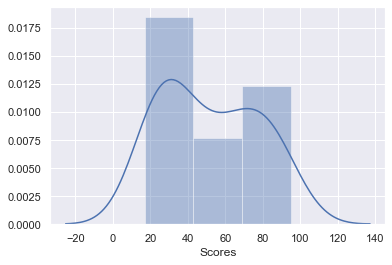

In [5]:
#Exploring pdf
sns.distplot(data['Scores'])

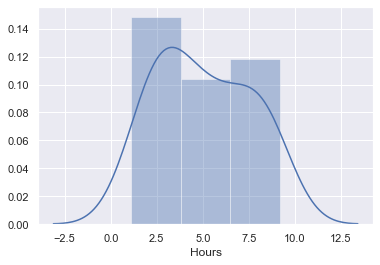

In [6]:
sns.distplot(data['Hours'])

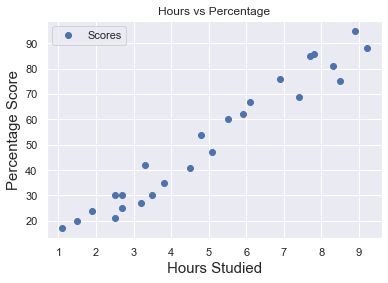

In [7]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied',fontsize=15)  
plt.ylabel('Percentage Score',fontsize=15)  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

In [8]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


*** pearson coefficient is very high which shows there is definately a linear relationship ***

*Step_4 : Preparing_data / splitting our input and target variable*

In [9]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

*Step_5 : Splitting data into test-train dataset*

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42) 

*Step_6 : Training the algorithm*

In [11]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 


LinearRegression()

In [12]:
print(f'Coefficient of regression line --- {reg.coef_}')
print(f'Intercept of regression line --- {reg.intercept_}')

Coefficient of regression line --- [9.68207815]
Intercept of regression line --- 2.826892353899737


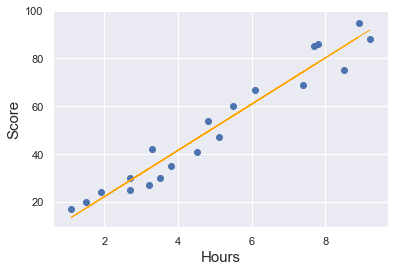

In [13]:
# Parametrized version of the regression line
y_hat = reg.coef_*X_train+reg.intercept_
#yhat = 9.91*x + 2.018

# Plotting the regression line
fig = plt.plot(X_train,y_hat, lw=1, c='orange')

# Plotting for the training data
plt.scatter(X_train, y_train)


# Labelling our axes
plt.xlabel('Hours', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.show()

**Making prediction on train and test dataset and checking accuracy**

In [14]:
 # Predicting the scores for the dataset
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

In [15]:
# Comparing Actual vs Predicted values of test dataset
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test , 'Error': y_test - y_pred_test})  
df['Difference%'] = np.absolute(df['Error']/df['Actual']*100)
df 

,Actual,Predicted,Error,Difference%
0,81,83.188141,-2.188141,2.701409
1,30,27.032088,2.967912,9.893041
2,21,27.032088,-6.032088,28.724227
3,76,69.633232,6.366768,8.377327
4,62,59.951153,2.048847,3.304591


Text(0.5, 1.0, 'Residuals PDF')

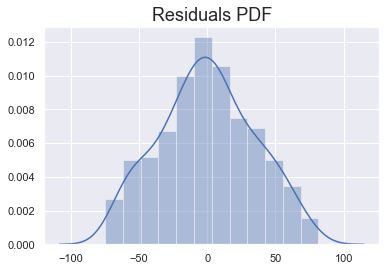

In [16]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [17]:
# Find the R-squared of the model
reg.score(X_train,y_train)

0.9491209376364416

In [18]:
from sklearn.metrics import mean_absolute_error  
print('Mean Absolute Error of training dataset:', mean_absolute_error(y_train, y_pred_train))
print('Mean Absolute Error of test dataset:', mean_absolute_error(y_test, y_pred_test))

Mean Absolute Error of training dataset: 5.221357478352559
Mean Absolute Error of test dataset: 3.9207511902099244


**Predicting for new data**

In [19]:
# You can also test with your own data
hours = 9.25
own_pred = round(reg.predict([[hours]])[0],2)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred))

No of Hours = 9.25
Predicted Score = 92.39
